In [62]:
import yfinance as yf
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
from finta import TA
import hvplot.pandas
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [63]:
fut1 = yf.Ticker("GEZ22.CME")

fut1_df = fut1.history(period="150d")
fut1_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-04-26,96.894997,97.019997,96.860001,96.949997,161184,0,0
2022-04-27,97.004997,97.014999,96.889999,96.925003,150953,0,0
2022-04-28,96.915001,96.949997,96.824997,96.849998,214466,0,0
2022-04-29,96.875000,96.904999,96.709999,96.769997,176996,0,0
2022-05-02,96.735001,96.790001,96.720001,96.760002,112511,0,0
...,...,...,...,...,...,...,...
2022-10-11,95.135002,95.169998,95.125000,95.144997,188738,0,0
2022-10-12,95.135002,95.165001,95.074997,95.110001,171270,0,0
2022-10-13,95.114998,95.125000,94.885002,94.955002,322401,0,0


In [64]:
fut1_df = fut1_df.drop(columns=["Dividends", "Stock Splits"])

fut1_df

,Open,High,Low,Close,Volume
Date,,,,,
2022-04-26,96.894997,97.019997,96.860001,96.949997,161184
2022-04-27,97.004997,97.014999,96.889999,96.925003,150953
2022-04-28,96.915001,96.949997,96.824997,96.849998,214466
2022-04-29,96.875000,96.904999,96.709999,96.769997,176996
2022-05-02,96.735001,96.790001,96.720001,96.760002,112511
...,...,...,...,...,...
2022-10-11,95.135002,95.169998,95.125000,95.144997,188738
2022-10-12,95.135002,95.165001,95.074997,95.110001,171270
2022-10-13,95.114998,95.125000,94.885002,94.955002,322401


In [65]:
fut1_df["Price Weighted Moving AVG"] = fut1_df["Close"].rolling(window=30).mean()

In [66]:
fut1_df["Volume Weighted Moving AVG"] = fut1_df["Volume"].rolling(window=30).mean()

fut1_df.head()

,Open,High,Low,Close,Volume,Price Weighted Moving AVG,Volume Weighted Moving AVG
Date,,,,,,,
2022-04-26,96.894997,97.019997,96.860001,96.949997,161184,NaN,NaN
2022-04-27,97.004997,97.014999,96.889999,96.925003,150953,NaN,NaN
2022-04-28,96.915001,96.949997,96.824997,96.849998,214466,NaN,NaN
2022-04-29,96.875000,96.904999,96.709999,96.769997,176996,NaN,NaN
2022-05-02,96.735001,96.790001,96.720001,96.760002,112511,NaN,NaN


In [67]:
fut1_df=fut1_df.dropna()

fut1_df

,Open,High,Low,Close,Volume,Price Weighted Moving AVG,Volume Weighted Moving AVG
Date,,,,,,,
2022-06-07,96.739998,96.769997,96.714996,96.760002,225490,96.865334,189024.333333
2022-06-08,96.760002,96.764999,96.709999,96.720001,123332,96.857667,187762.600000
2022-06-09,96.709999,96.714996,96.650002,96.665001,292115,96.849001,192468.000000
2022-06-10,96.669998,96.675003,96.324997,96.385002,486252,96.833501,201527.533333
2022-06-13,96.355003,96.355003,95.870003,96.095001,550459,96.811001,213976.300000
...,...,...,...,...,...,...,...
2022-10-11,95.135002,95.169998,95.125000,95.144997,188738,95.491667,195649.033333
2022-10-12,95.135002,95.165001,95.074997,95.110001,171270,95.465500,196164.066667
2022-10-13,95.114998,95.125000,94.885002,94.955002,322401,95.432834,201673.600000


In [68]:
fut1_df["Price Lower Than Weighted Moving AVG"] = fut1_df["Price Weighted Moving AVG"] > fut1_df["Close"]

In [69]:
fut1_df["Volume Higher than Weighted Moving AVG"] = fut1_df["Volume Weighted Moving AVG"] > fut1_df["Volume"]

In [70]:
fut1_df.tail(10)

,Open,High,Low,Close,Volume,Price Weighted Moving AVG,Volume Weighted Moving AVG,Price Lower Than Weighted Moving AVG,Volume Higher than Weighted Moving AVG
Date,,,,,,,,,
2022-10-04,95.300003,95.404999,95.290001,95.300003,194547,95.620667,199692.166667,True,True
2022-10-05,95.315002,95.334999,95.260002,95.294998,112403,95.596334,197496.133333,True,True
2022-10-06,95.305000,95.324997,95.264999,95.285004,163208,95.572667,197461.066667,True,True
2022-10-07,95.269997,95.269997,95.169998,95.190002,163149,95.545834,198080.666667,True,True
2022-10-10,95.175003,95.184998,95.114998,95.129997,67918,95.517333,193463.366667,True,True
2022-10-11,95.135002,95.169998,95.125000,95.144997,188738,95.491667,195649.033333,True,True
2022-10-12,95.135002,95.165001,95.074997,95.110001,171270,95.465500,196164.066667,True,True
2022-10-13,95.114998,95.125000,94.885002,94.955002,322401,95.432834,201673.600000,True,False
2022-10-14,94.934998,94.970001,94.885002,94.894997,322401,95.399833,206263.300000,True,False


<AxesSubplot:>

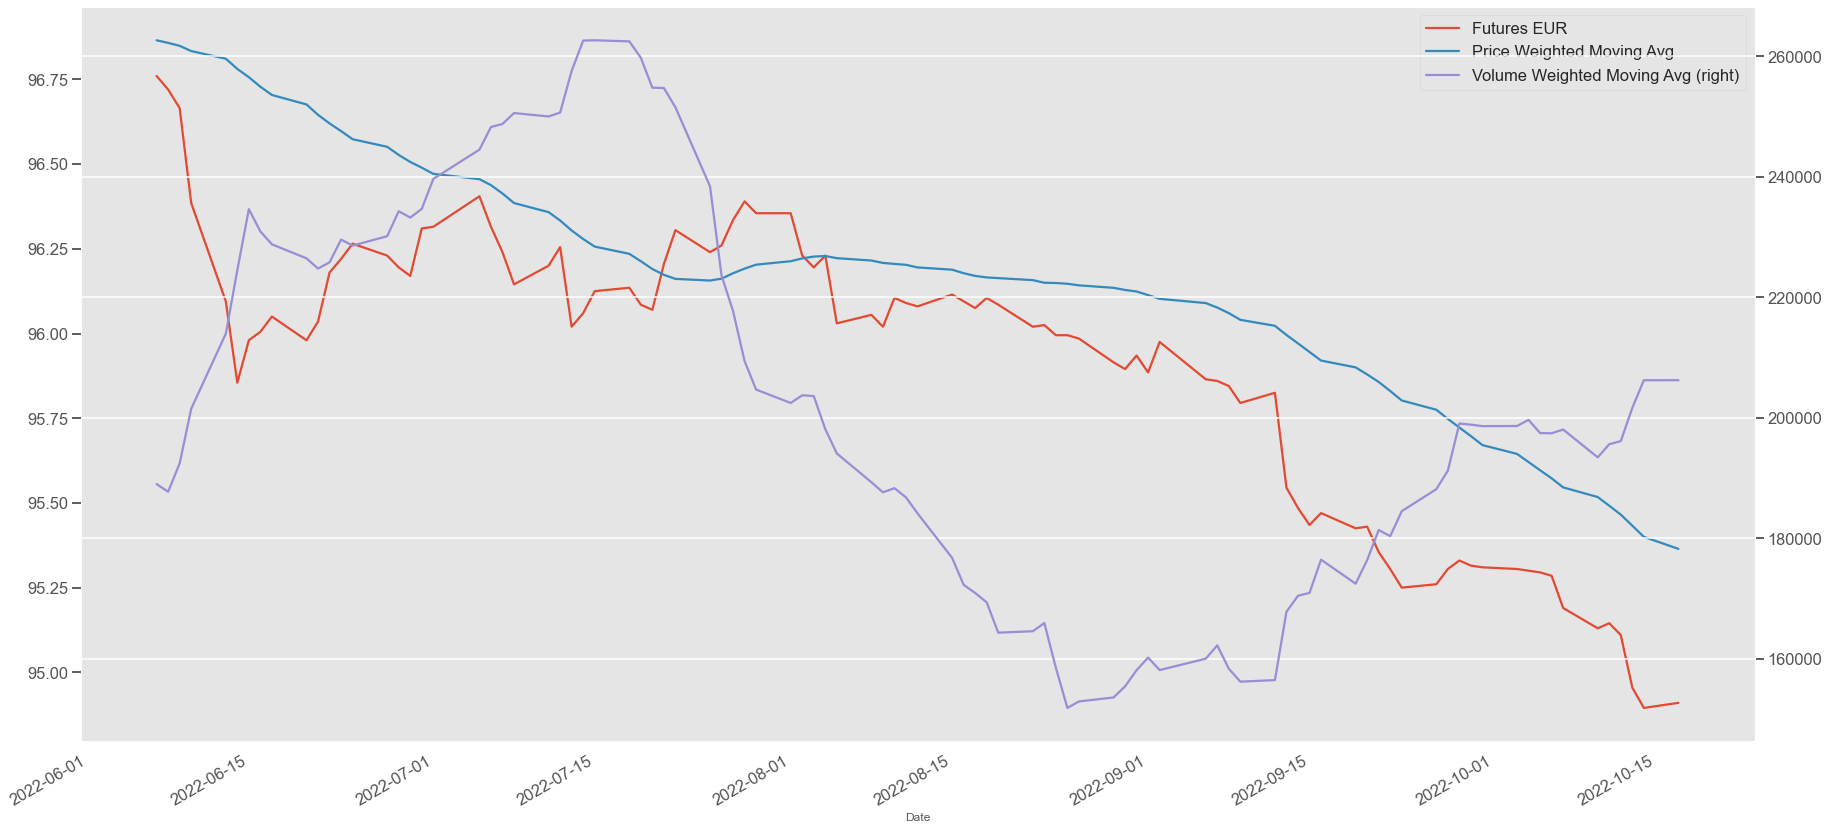

In [71]:
fut1_close_price = fut1_df["Close"]
pwmavg = fut1_df["Price Weighted Moving AVG"]
vwmavg = fut1_df["Volume Weighted Moving AVG"]

plt.rc('figure', figsize=(30,15))
plt.style.use('ggplot')

fut1_close_price.plot(label="Futures EUR", legend=True)
pwmavg.plot(label='Price Weighted Moving Avg', legend=True)
vwmavg.plot(secondary_y = True, label="Volume Weighted Moving Avg", legend=True)

In [72]:
fut1_signals_df = pd.DataFrame()
fut1_signals_df["Close"] = fut1_df["Close"]
fut1_signals_df["Signal"] = 0.0
fut1_signals_df["Signal"] = fut1_df["Volume Higher than Weighted Moving AVG"] * fut1_df["Price Lower Than Weighted Moving AVG"]
fut1_signals_df["Signal"] = fut1_signals_df["Signal"].astype(int)
fut1_signals_df["Entry/Exit"] = fut1_signals_df["Signal"].diff()
fut1_signals_df.head(10)


,Close,Signal,Entry/Exit
Date,,,
2022-06-07,96.760002,0,NaN
2022-06-08,96.720001,1,1.0
2022-06-09,96.665001,0,-1.0
2022-06-10,96.385002,0,0.0
2022-06-13,96.095001,0,0.0
2022-06-14,95.855003,0,0.0
2022-06-15,95.980003,0,0.0
2022-06-16,96.004997,0,0.0
2022-06-17,96.050003,1,1.0


In [73]:
# Visualize entry position relative to close price
entry = fut1_signals_df[fut1_signals_df["Entry/Exit"] == 1.0]["Close"].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = fut1_signals_df[fut1_signals_df["Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color='orange',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the futures contract
security_close = fut1_signals_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize weighted moving averages
weighted_moving_avgs = fut1_df[["Price Weighted Moving AVG"]].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)

# Overlay plots
entry_exit_plot = security_close * weighted_moving_avgs * entry * exit
entry_exit_plot

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .Curve.II         :Curve   [Date]   (Price Weighted Moving AVG)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [74]:
z = 1
profit_or_loss = 0.00
starting_price = (fut1_df['Close'].head(1))
starting_price = float(starting_price)

ending_price = (fut1_df['Close'].tail(1))
ending_price = float(ending_price)

#returns = (profit_or_loss / starting_price)
#return_pct = "{:.2%}".format(returns)

In [75]:
print("Futures EUR Momentum Trading Results:", "\n")
print("The starting price is: $", round(starting_price,2))
print("The ending price is: $", round(ending_price,2), "\n")

#Getting buy and sell dates
for index, row in fut1_signals_df.iterrows():
 #   if row['Volume Higher than Weighted Moving AVG'] == 1:
       # if row['Price Lower Than Weighted Moving AVG'] == 1:
    if row['Signal'] == 1:
        if row['Entry/Exit'] != -1:
            if z == 1:
                print (index, round(row['Close'],2), '- Buy')
                close = row['Close']
                profit_or_loss = profit_or_loss - close
                z = z - 1
                
    else:
     #   if row['Volume Higher than Weighted Moving AVG'] == 0:
      #      if row['Price Lower Than Weighted Moving AVG'] == 0:
            if row['Entry/Exit'] == -1:
                if z == 0:
                    print (index, round(row['Close'],2), '- Sell')
                    close = row['Close'] 
                    profit_or_loss = profit_or_loss + close
                    returns = (profit_or_loss / starting_price)
                    return_pct = "{:.2%}".format(returns)
                    print ("Total Profit/Loss is $",round(profit_or_loss,2))
                    print ("Total Return Percentage is", return_pct, "\n")
                    z = z + 1
                    

                    
entire_hold_return = (ending_price - starting_price)
entire_hold_pct = "{:.2%}".format((ending_price - starting_price) / starting_price)
print("The return for holding for the entire period was $",round(entire_hold_return,2), "or", entire_hold_pct, ".")
profit_or_loss = 0.00      

Futures EUR Momentum Trading Results: 

The starting price is: $ 96.76
The ending price is: $ 94.91 

2022-06-08 00:00:00 96.72 - Buy
2022-06-09 00:00:00 96.67 - Sell
Total Profit/Loss is $ -0.06
Total Return Percentage is -0.06% 

2022-06-17 00:00:00 96.05 - Buy
2022-06-22 00:00:00 96.18 - Sell
Total Profit/Loss is $ 0.07
Total Return Percentage is 0.08% 

2022-06-27 00:00:00 96.23 - Buy
2022-07-01 00:00:00 96.32 - Sell
Total Profit/Loss is $ 0.16
Total Return Percentage is 0.17% 

2022-07-05 00:00:00 96.4 - Buy
2022-07-08 00:00:00 96.14 - Sell
Total Profit/Loss is $ -0.1
Total Return Percentage is -0.10% 

2022-07-11 00:00:00 96.2 - Buy
2022-07-13 00:00:00 96.02 - Sell
Total Profit/Loss is $ -0.28
Total Return Percentage is -0.29% 

2022-07-15 00:00:00 96.12 - Buy
2022-07-21 00:00:00 96.21 - Sell
Total Profit/Loss is $ -0.2
Total Return Percentage is -0.21% 

2022-08-08 00:00:00 96.06 - Buy
2022-08-10 00:00:00 96.11 - Sell
Total Profit/Loss is $ -0.15
Total Return Percentage is -0.16

In [76]:
fut1_price_plot = fut1_df["Close"].hvplot.line(title="FUT EUR Price")
fut1_price_plot

:Curve   [Date]   (Close)

In [77]:
fut1_price = fut1_df[['Close']]
scaler = MinMaxScaler(feature_range=(-1,1))
fut1_price['Close']=scaler.fit_transform(fut1_price['Close'].values.reshape(-1,1))

In [78]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(fut1_price, lookback)

In [79]:
import torch
import torch.nn as nn
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [80]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100

In [81]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [82]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [83]:
import time
hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []
for t in range(num_epochs):
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.23847435414791107
Epoch  1 MSE:  0.15070103108882904
Epoch  2 MSE:  0.10011828690767288
Epoch  3 MSE:  0.08669652789831161
Epoch  4 MSE:  0.10564877837896347
Epoch  5 MSE:  0.08698859810829163
Epoch  6 MSE:  0.0778738409280777
Epoch  7 MSE:  0.07816898077726364
Epoch  8 MSE:  0.07927864044904709
Epoch  9 MSE:  0.07695090025663376
Epoch  10 MSE:  0.06979917734861374
Epoch  11 MSE:  0.05839071422815323
Epoch  12 MSE:  0.04687519744038582
Epoch  13 MSE:  0.045318201184272766
Epoch  14 MSE:  0.03749362379312515
Epoch  15 MSE:  0.019440926611423492
Epoch  16 MSE:  0.0210257638245821
Epoch  17 MSE:  0.02390468306839466
Epoch  18 MSE:  0.012880557216703892
Epoch  19 MSE:  0.023841286078095436
Epoch  20 MSE:  0.015246022492647171
Epoch  21 MSE:  0.010049953125417233
Epoch  22 MSE:  0.013234456069767475
Epoch  23 MSE:  0.015449556522071362
Epoch  24 MSE:  0.014536510221660137
Epoch  25 MSE:  0.012390254996716976
Epoch  26 MSE:  0.011195722967386246
Epoch  27 MSE:  0.01175682432

In [84]:
fut1_lstm_prediction_df = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
fut1_lstm_original_df = pd.DataFrame(scaler.inverse_transform(y_train_lstm.detach().numpy()))
fut1_lstm_test_df = pd.DataFrame(scaler.inverse_transform(y_test_lstm.detach().numpy()))

In [85]:
lstm_fut1_plot= fut1_lstm_prediction_df.hvplot(label="LSTM Training Prediction Price") * fut1_lstm_original_df.hvplot(label="Actual Price") * fut1_lstm_test_df.hvplot(label="LSTM Test Prediction Price") 
lstm_fut1_plot

:Overlay
   .Curve.LSTM_Training_Prediction_Price :Curve   [index]   (0)
   .Curve.Actual_Price                   :Curve   [index]   (0)
   .Curve.LSTM_Test_Prediction_Price     :Curve   [index]   (0)

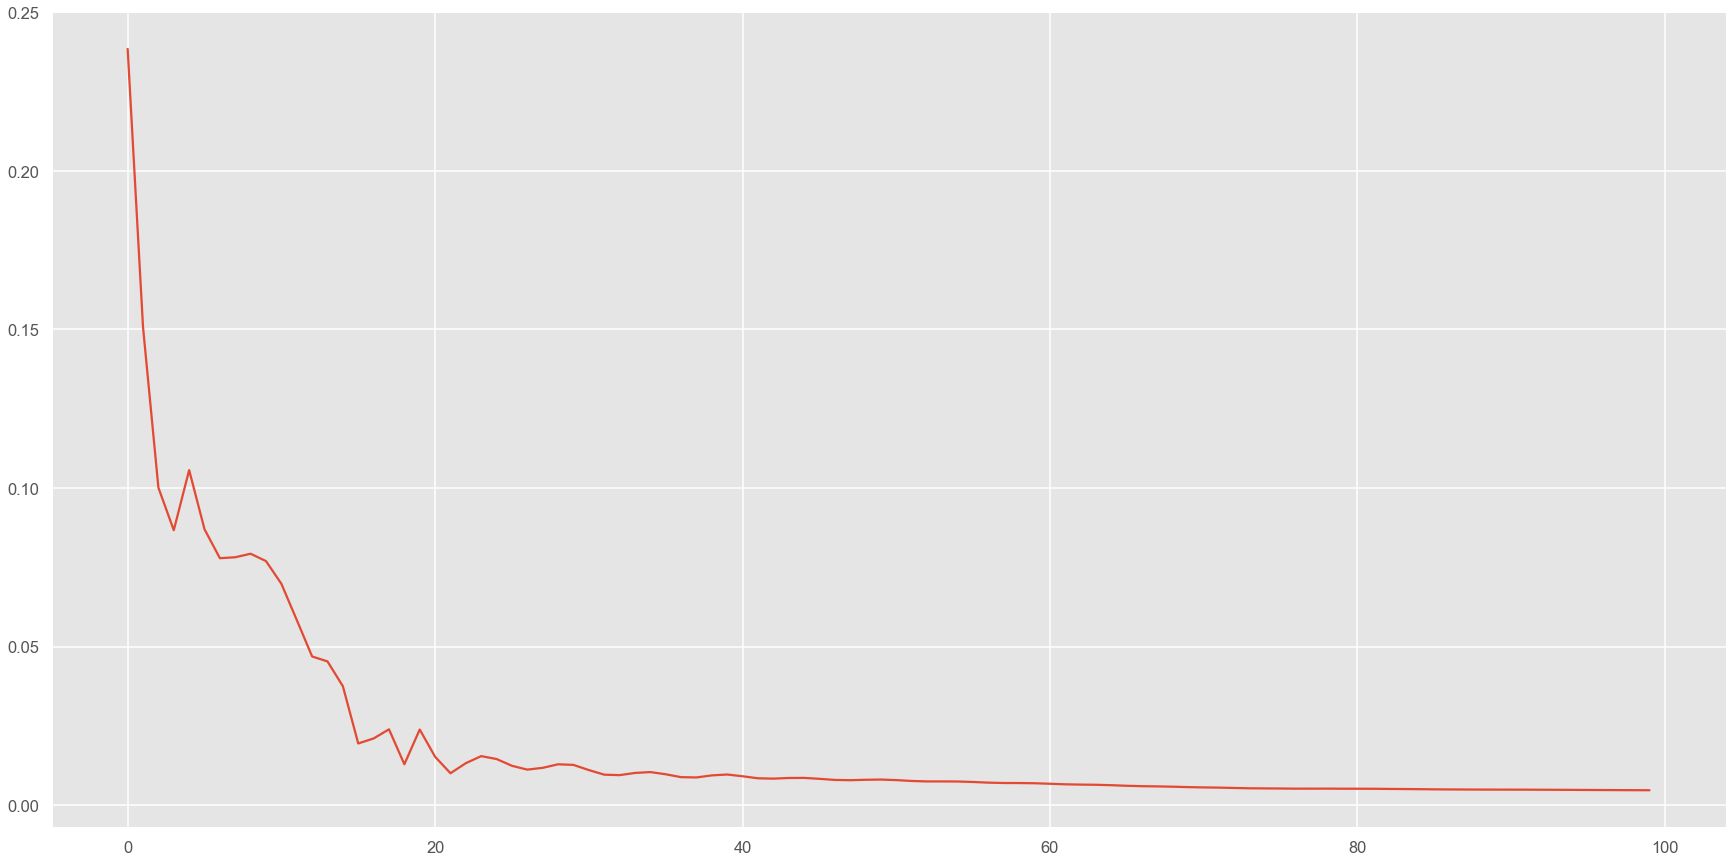

In [86]:
fut1_lstm_training_loss_plot = plt.plot(hist)
fut1_lstm_training_loss_plot

In [87]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_lstm.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_lstm.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)
lstm.append(training_time)

Train Score: 0.06 RMSE
Test Score: 0.13 RMSE


In [88]:
fut1_df

,Open,High,Low,Close,Volume,Price Weighted Moving AVG,Volume Weighted Moving AVG,Price Lower Than Weighted Moving AVG,Volume Higher than Weighted Moving AVG
Date,,,,,,,,,
2022-06-07,96.739998,96.769997,96.714996,96.760002,225490,96.865334,189024.333333,True,False
2022-06-08,96.760002,96.764999,96.709999,96.720001,123332,96.857667,187762.600000,True,True
2022-06-09,96.709999,96.714996,96.650002,96.665001,292115,96.849001,192468.000000,True,False
2022-06-10,96.669998,96.675003,96.324997,96.385002,486252,96.833501,201527.533333,True,False
2022-06-13,96.355003,96.355003,95.870003,96.095001,550459,96.811001,213976.300000,True,False
...,...,...,...,...,...,...,...,...,...
2022-10-11,95.135002,95.169998,95.125000,95.144997,188738,95.491667,195649.033333,True,True
2022-10-12,95.135002,95.165001,95.074997,95.110001,171270,95.465500,196164.066667,True,True
2022-10-13,95.114998,95.125000,94.885002,94.955002,322401,95.432834,201673.600000,True,False


In [89]:
fut1_df2=fut1_df

In [90]:
pd.options.mode.chained_assignment = None

In [91]:
fut1_df["Open"] = pd.to_numeric(fut1_df["Open"])
fut1_df["Open"].describe()

count    93.000000
mean     95.920215
std       0.428208
min      94.889999
25%      95.559998
50%      96.035004
75%      96.209999
max      96.760002
Name: Open, dtype: float64

In [92]:
fut1_df["Low"] = pd.to_numeric(fut1_df["Low"])
fut1_df["Low"].describe()

count    93.000000
mean     95.848763
std       0.424031
min      94.875000
25%      95.434998
50%      95.989998
75%      96.139999
max      96.714996
Name: Low, dtype: float64

In [93]:
fut1_df["Close"] = pd.to_numeric(fut1_df["Close"])
fut1_df["Close"].describe()

count    93.000000
mean     95.903011
std       0.429998
min      94.894997
25%      95.485001
50%      96.029999
75%      96.199997
max      96.760002
Name: Close, dtype: float64

In [94]:
fut1_df["Price Weighted Moving AVG"] = pd.to_numeric(fut1_df["Price Weighted Moving AVG"])
fut1_df["Price Weighted Moving AVG"].describe()

count    93.000000
mean     96.160624
std       0.363680
min      95.364334
25%      95.970833
50%      96.173167
75%      96.358167
max      96.865334
Name: Price Weighted Moving AVG, dtype: float64

In [95]:
fut1_df["Volume Weighted Moving AVG"] = pd.to_numeric(fut1_df["Volume Weighted Moving AVG"])
fut1_df["Volume Weighted Moving AVG"].describe()

count        93.000000
mean     201910.484229
std       32167.290294
min      151881.233333
25%      176413.966667
50%      198149.966667
75%      228818.433333
max      262679.300000
Name: Volume Weighted Moving AVG, dtype: float64

In [96]:
fut1_df["Volume"] = pd.to_numeric(fut1_df["Volume"])
fut1_df["Volume"].describe()

count        93.000000
mean     205600.795699
std       95494.550891
min       67918.000000
25%      140533.000000
50%      184710.000000
75%      239339.000000
max      550459.000000
Name: Volume, dtype: float64

In [97]:
fut1_df= pd.get_dummies(fut1_df, columns=['Price Lower Than Weighted Moving AVG', "Volume Higher than Weighted Moving AVG"])
fut1_df= fut1_df.astype(float)
fut1_df

,Open,High,Low,Close,Volume,Price Weighted Moving AVG,Volume Weighted Moving AVG,Price Lower Than Weighted Moving AVG_False,Price Lower Than Weighted Moving AVG_True,Volume Higher than Weighted Moving AVG_False,Volume Higher than Weighted Moving AVG_True
Date,,,,,,,,,,,
2022-06-07,96.739998,96.769997,96.714996,96.760002,225490.0,96.865334,189024.333333,0.0,1.0,1.0,0.0
2022-06-08,96.760002,96.764999,96.709999,96.720001,123332.0,96.857667,187762.600000,0.0,1.0,0.0,1.0
2022-06-09,96.709999,96.714996,96.650002,96.665001,292115.0,96.849001,192468.000000,0.0,1.0,1.0,0.0
2022-06-10,96.669998,96.675003,96.324997,96.385002,486252.0,96.833501,201527.533333,0.0,1.0,1.0,0.0
2022-06-13,96.355003,96.355003,95.870003,96.095001,550459.0,96.811001,213976.300000,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-11,95.135002,95.169998,95.125000,95.144997,188738.0,95.491667,195649.033333,0.0,1.0,0.0,1.0
2022-10-12,95.135002,95.165001,95.074997,95.110001,171270.0,95.465500,196164.066667,0.0,1.0,0.0,1.0
2022-10-13,95.114998,95.125000,94.885002,94.955002,322401.0,95.432834,201673.600000,0.0,1.0,1.0,0.0


In [98]:
target_price = fut1_df2[['Close']]
target_price = fut1_df2.astype(float)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(fut1_df, target_price, test_size = 0.2, random_state = 7)

In [100]:
dtype= torch.float
X_train_tensor = torch.tensor(X_train.values, dtype=dtype)
X_test_tensor = torch.tensor(X_test.values, dtype=dtype)

y_train_tensor = torch.tensor(y_train.values, dtype=dtype)
y_test_tensor = torch.tensor(y_test.values, dtype=dtype)

In [101]:
inp = 11
out = 1
hid = 100
loss_fn = torch.nn.MSELoss()
learning_rate = 0.0001

In [102]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                           torch.nn.Sigmoid(),
                           torch.nn.Linear(hid, out))

In [103]:
for iter in range(1000):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    
    if iter % 100 == 0:
        print(iter, loss.item())
        
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

C:\Users\17045\anaconda3\envs\atmdev2\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([74, 9])) that is different to the input size (torch.Size([74, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 10290799616.0
100 8624194560.0
200 8341321216.0
300 8285740544.0
400 8268399616.0
500 8258284032.0
600 8250207232.0
700 8243214848.0
800 8237060608.0
900 8231620096.0


In [104]:
torch.save(model, 'fut eur price')

In [105]:
saved_model = torch.load('fut eur price')

In [106]:
y_pred_tensor = saved_model(X_test_tensor)

In [107]:
y_pred = y_pred_tensor.detach().numpy()

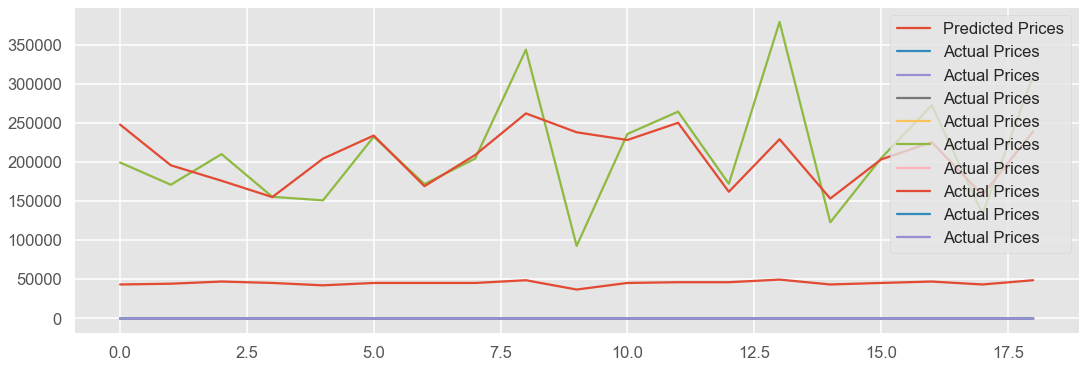

In [108]:
plt.figure(figsize=(18,6))
plt.plot(y_pred, label='Predicted Prices')
plt.plot(y_test.values, label = 'Actual Prices')

plt.legend()
plt.show()